# Predicting the eolian energy production

This Notebook aims at predicting the energy producte by wind turbines.

It uses weather data extracted from the MeteoFrance numerical models, as well as history of productions provided by RTE.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filename_wind_regions = "../data/mean_daily_wind_j0.csv"

filename_energy_preduction = "../../clean_datasets/rte_agg_daily_2014_2024.csv"

,auvergne_rhône_alpes,bourgogne_franche_comté,bretagne,centre_val_de_loire,corse,grand_est,hauts_de_france,normandie,nouvelle_aquitaine,occitanie,pays_de_la_loire,provence_alpes_côte_d_azur,île_de_france,days_from_start
time,,,,,,,,,,,,,,
2022-02-01,4.205852,4.060221,5.199642,4.778342,3.561165,5.454614,6.432882,6.416779,3.152589,6.048412,4.748808,5.744050,4.977423,0
2022-02-02,3.156469,3.178754,3.410363,3.398772,2.383473,4.102714,4.987001,4.406740,2.294659,4.454043,3.110102,5.584663,3.663799,1
2022-02-03,2.234994,2.016168,3.373047,2.801909,2.217947,2.946621,4.726071,4.218961,2.206917,2.502523,3.111282,2.187303,3.396305,2
2022-02-04,2.453711,3.737635,4.975356,4.658530,2.061253,5.098637,6.986221,6.097625,3.139985,2.935683,4.232595,2.280711,5.306362,3
2022-02-05,2.609659,2.231746,4.131737,3.149658,1.859197,3.742508,5.961911,5.229400,2.279602,3.726291,3.058013,3.321954,3.946324,4


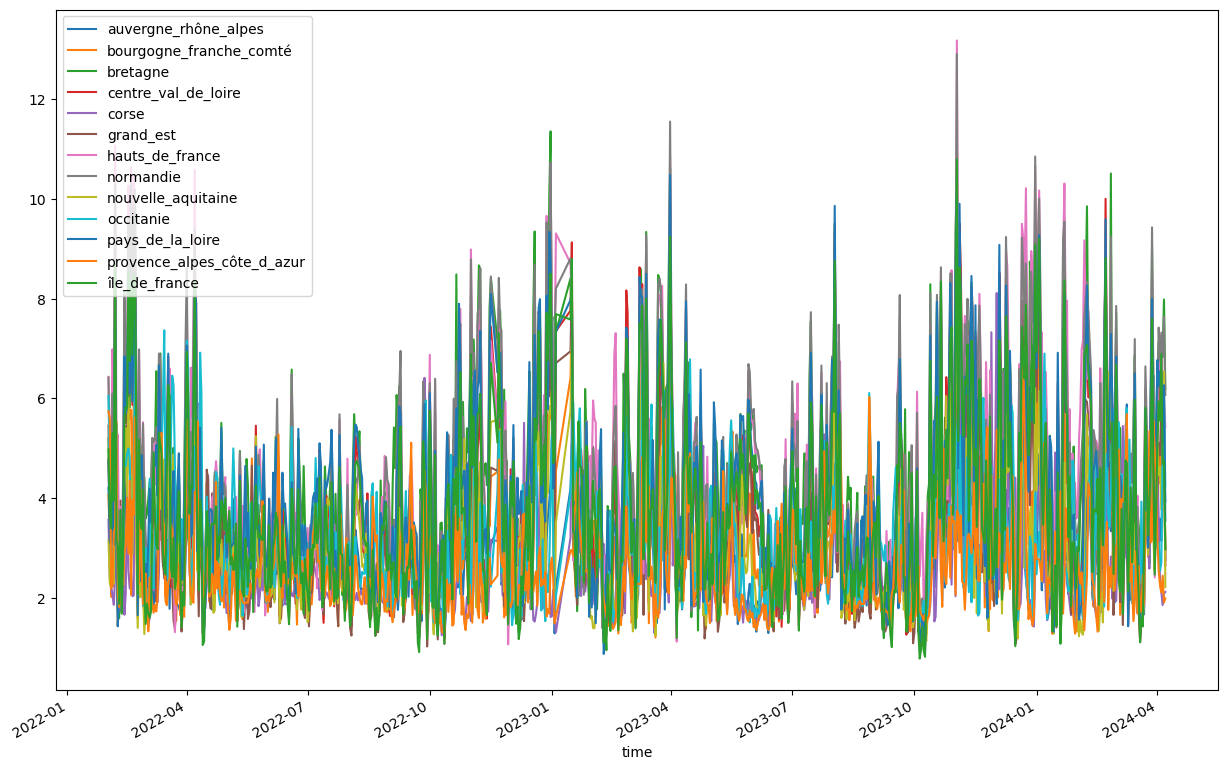

In [5]:
df_ssrd_regions = pd.read_csv(filename_wind_regions, parse_dates=["time"]).set_index(
    "time"
)
# sanitise the column names
region_names = [
    col.replace(" ", "_").replace("'", "_").replace("-", "_").lower()
    for col in df_ssrd_regions.columns
]
df_ssrd_regions.columns = region_names
region_names = df_ssrd_regions.columns
df_ssrd_regions.plot(figsize=(15, 10))
df_ssrd_regions["days_from_start"] = [
    (date - df_ssrd_regions.index[0]).days for date in df_ssrd_regions.index
]
df_ssrd_regions.head()

In [6]:
df_energy_preduction = pd.read_csv(filename_energy_preduction, index_col=0)[
    ["Eolien", "Solaire"]
]
df_energy_preduction.index = pd.to_datetime(df_energy_preduction.index)
df_energy_preduction.head(), df_energy_preduction.tail()

(              Eolien  Solaire
 Date                         
 2015-01-01   51127.0  11370.5
 2015-01-02   78933.0   8297.5
 2015-01-03  105299.0   5860.5
 2015-01-04   30061.0   6926.0
 2015-01-05   16004.0   9786.5,
               Eolien  Solaire
 Date                         
 2024-04-04  285321.0  76581.5
 2024-04-05  232208.5  72847.5
 2024-04-06  225106.0  61577.5
 2024-04-07  138049.5  46718.5
 2024-04-08   53990.0  26677.0)

In [7]:
df_energy_preduction.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02',
               '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06',
               '2024-04-07', '2024-04-08'],
              dtype='datetime64[ns]', name='Date', length=3386, freq=None)

In [8]:
# align the indexes of the two dataframes
data = pd.concat([df_ssrd_regions, df_energy_preduction], join="inner", axis=1)
data.head()

,auvergne_rhône_alpes,bourgogne_franche_comté,bretagne,centre_val_de_loire,corse,grand_est,hauts_de_france,normandie,nouvelle_aquitaine,occitanie,pays_de_la_loire,provence_alpes_côte_d_azur,île_de_france,days_from_start,Eolien,Solaire
2022-02-01,4.205852,4.060221,5.199642,4.778342,3.561165,5.454614,6.432882,6.416779,3.152589,6.048412,4.748808,5.744050,4.977423,0,227954.0,21938.5
2022-02-02,3.156469,3.178754,3.410363,3.398772,2.383473,4.102714,4.987001,4.406740,2.294659,4.454043,3.110102,5.584663,3.663799,1,138768.0,21271.0
2022-02-03,2.234994,2.016168,3.373047,2.801909,2.217947,2.946621,4.726071,4.218961,2.206917,2.502523,3.111282,2.187303,3.396305,2,63557.5,20527.5
2022-02-04,2.453711,3.737635,4.975356,4.658530,2.061253,5.098637,6.986221,6.097625,3.139985,2.935683,4.232595,2.280711,5.306362,3,178764.0,19051.0
2022-02-05,2.609659,2.231746,4.131737,3.149658,1.859197,3.742508,5.961911,5.229400,2.279602,3.726291,3.058013,3.321954,3.946324,4,145138.0,41271.5


In [9]:
from statsmodels.formula.api import ols

# split test for time series
from sklearn.model_selection import TimeSeriesSplit

# Modeling

4 models are tested :
- Only Total wind speed (no region details)
- Only regions Wind Speed
- Total Wind Speed + time
- Regions wind Speed + tim

In [10]:
exo_vars = region_names
data["mean_wind"] = data[exo_vars].mean(axis=1)
endog_var = "Eolien"

In [21]:
tscv = TimeSeriesSplit(n_splits=60, test_size=1)  # testing on 3 days forcast

In [22]:
def test_model(formula="Eolien ~ mean_wind"):
    mod_1_mape = []
    for i, (train_index, test_index) in enumerate(tscv.split(data)):
        model_1 = ols(formula, data=data.iloc[train_index]).fit()
        if i == 0:
            first_test_index = test_index
            first_model_1 = model_1
        predictions = model_1.predict(data.iloc[test_index])
        error = data.iloc[test_index]["Eolien"] - predictions
        mape = (error.abs() / data.iloc[test_index]["Eolien"]).mean()
        mod_1_mape.append(mape)
    last_test_index = test_index
    last_model_1 = model_1
    return mod_1_mape, first_test_index, first_model_1, last_test_index, last_model_1


formula_1 = "Eolien ~ mean_wind"
mod_1_mape, first_test_index, first_model_1, last_test_index, last_model_1 = test_model(
    formula=formula_1
)

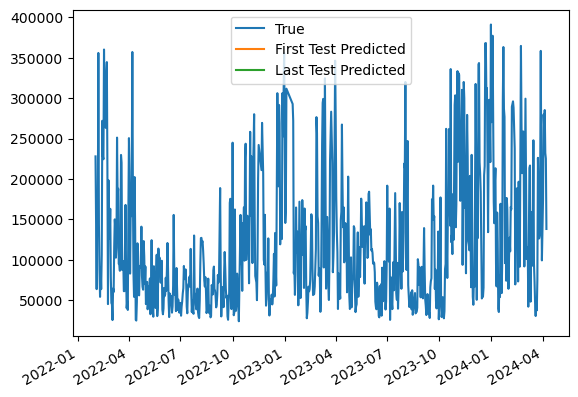

In [23]:
ax = data.plot(y="Eolien", label="True")
first_model_1.predict(data.iloc[first_test_index]).plot(
    ax=ax, label="First Test Predicted"
)
last_model_1.predict(data.iloc[last_test_index]).plot(
    ax=ax, label="Last Test Predicted"
)
ax.legend()

Text(0.5, 0, 'MAPE')

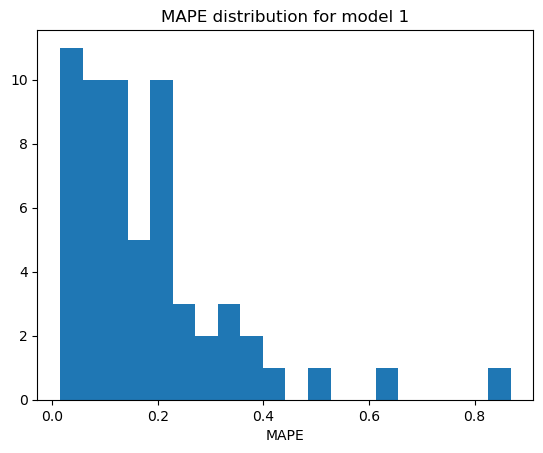

In [24]:
fig, ax = plt.subplots()
ax.hist(mod_1_mape, bins=20)
ax.set_title("MAPE distribution for model 1")
ax.set_xlabel("MAPE")

In [25]:
formula_2 = f"Eolien ~ {' + '.join(exo_vars)}"
print(formula_2)
mod_2_mape, first_test_index, first_model_2, last_test_index, last_model_2 = test_model(
    formula_2
)

Eolien ~ auvergne_rhône_alpes + bourgogne_franche_comté + bretagne + centre_val_de_loire + corse + grand_est + hauts_de_france + normandie + nouvelle_aquitaine + occitanie + pays_de_la_loire + provence_alpes_côte_d_azur + île_de_france


Text(0.5, 1.0, 'MAPE distribution for model 2')

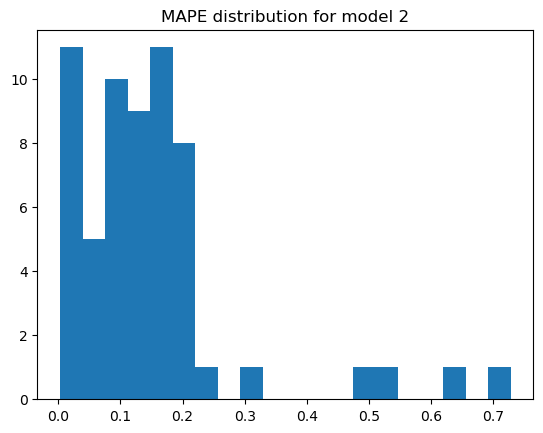

In [26]:
fig, ax = plt.subplots()
ax.hist(mod_2_mape, bins=20)
ax.set_title("MAPE distribution for model 2")

In [27]:
formula_3 = formula_1 + " + days_from_start"
mod_3_mape, first_test_index, first_model_3, last_test_index, last_model_3 = test_model(
    formula_3
)
formula_4 = formula_2 + " + days_from_start"
mod_4_mape, first_test_index, first_model_4, last_test_index, last_model_4 = test_model(
    formula_4
)

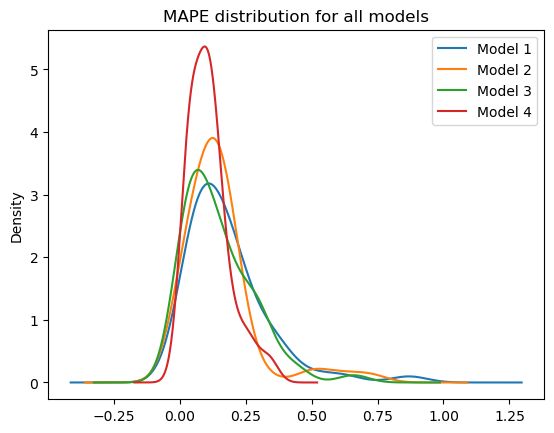

In [28]:
# display the MAPE distribution for all models (KDE)
fig, ax = plt.subplots()
for i, mape in enumerate([mod_1_mape, mod_2_mape, mod_3_mape, mod_4_mape]):
    pd.Series(mape).plot.kde(ax=ax, label=f"Model {i+1}")
ax.set_title("MAPE distribution for all models")
ax.legend()

In [29]:
# print mean MAPE for all models
for i, mape in enumerate([mod_1_mape, mod_2_mape, mod_3_mape, mod_4_mape]):
    print(f"Model {i+1} mean MAPE: {np.mean(mape):.2%}")

Model 1 mean MAPE: 18.09%
Model 2 mean MAPE: 14.96%
Model 3 mean MAPE: 14.78%
Model 4 mean MAPE: 11.05%


# Conclusion

In contrast with the photo-voltaic power prediction, the eolien is a bit more consistent with the expected trend :
- using regional data features is better than global wind values (even with the time trend added to the global value)
- adding the time trend to the model improve the performances

The mean performance of model 4 (11% error) is quite good !

In [20]:
data[["Eolien", "Solaire"]].mean()

Eolien     121818.205577
Solaire     55192.725032
dtype: float64

As the production of the wind turbine is around 2 time higher than the Sun production, the performance of the wind energy prediction model is more important for the overall performance of the project.